In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("weather_data.csv")

In [11]:


# Assuming 'data' is your DataFrame with columns: 'Temperature', 'Humidity', 'Pressure'
# Add shifted columns for Day+1, Day+2, Day+3
data['Day+1 Temp'] = data['temperature'].shift(-1)
data['Day+2 Temp'] = data['temperature'].shift(-2)
data['Day+3 Temp'] = data['temperature'].shift(-3)

# Drop rows with NaN values created by shifting
data = data.dropna()

# Define features (X) and targets (y)
X = data[['temperature', 'humidity', 'pressure']]
y = data[['Day+1 Temp', 'Day+2 Temp', 'Day+3 Temp']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now you can proceed with model training or analysis


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients and intercepts
print("Coefficients for each target:", model.coef_)
print("Intercepts for each target:", model.intercept_)

Coefficients for each target: [[35.859402    1.1004325   2.42774461]
 [34.78345889  2.79498974  4.34111823]
 [33.70312582  4.8711284   5.648706  ]]
Intercepts for each target: [-1.81225066 -2.53131991 -3.37601289]


In [13]:
y_pred = model.predict(X_test)

# Evaluate performance for each target variable
for i, target in enumerate(['Day+1 Temp', 'Day+2 Temp', 'Day+3 Temp']):
    print(f"Metrics for {target}:")
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  R-squared (R2): {r2}")
    print()

Metrics for Day+1 Temp:
  Mean Squared Error (MSE): 0.5414112383099718
  Mean Absolute Error (MAE): 0.5455004802482811
  R-squared (R2): 0.9897534300772304

Metrics for Day+2 Temp:
  Mean Squared Error (MSE): 2.094799297526817
  Mean Absolute Error (MAE): 1.092120641327911
  R-squared (R2): 0.9607074922456591

Metrics for Day+3 Temp:
  Mean Squared Error (MSE): 4.428669110991648
  Mean Absolute Error (MAE): 1.612481869328338
  R-squared (R2): 0.917714840096338



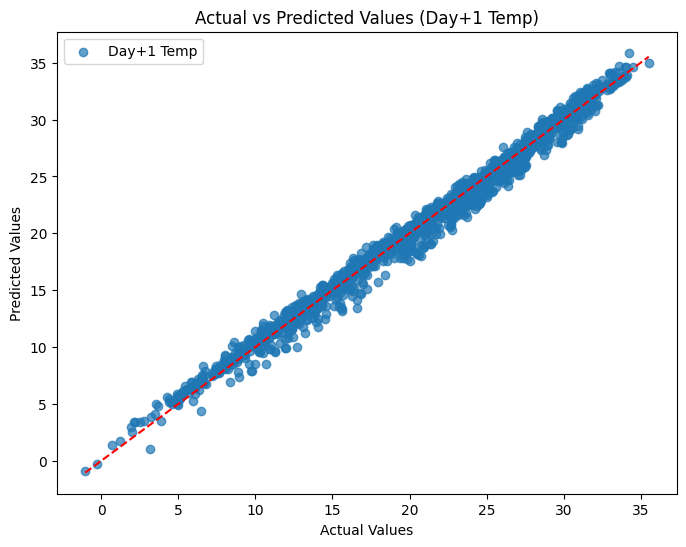

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test.iloc[:, 0], y_pred[:, 0], alpha=0.7, label='Day+1 Temp')
plt.plot([min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])],
         [min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Day+1 Temp)")
plt.legend()
plt.show()

In [16]:
# Example current conditions for prediction (replace with actual values)
current_conditions = pd.DataFrame({
    'temperature': [30],  # Replace with actual temperature value
    'humidity': [50],     # Replace with actual humidity value
    'pressure': [1013]    # Replace with actual pressure value
})

# Normalize the current conditions using the scaler
current_conditions_scaled = scaler.transform(current_conditions)

# Predict future temperatures
future_predictions = model.predict(current_conditions_scaled)
print("Predicted Temperatures for Next Days:")
print(f"  Day 1: {future_predictions[0, 0]:.2f}°C")
print(f"  Day 2: {future_predictions[0, 1]:.2f}°C")
print(f"  Day 3: {future_predictions[0, 2]:.2f}°C")


Predicted Temperatures for Next Days:
  Day 1: 33.96°C
  Day 2: 36.74°C
  Day 3: 38.26°C
